# HW02: Python 
(due October 5th)

In [58]:
# Import Libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set()

# Load Data
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()
print(data['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [25]:
X_full, y_full = data.data, data.target
n_samples = X_full.shape[0]
n_features = X_full.shape[1]
print(n_samples,n_features)

X_df=pd.DataFrame(X_full, columns=data['feature_names'])

20640 8


# Summary Statistics

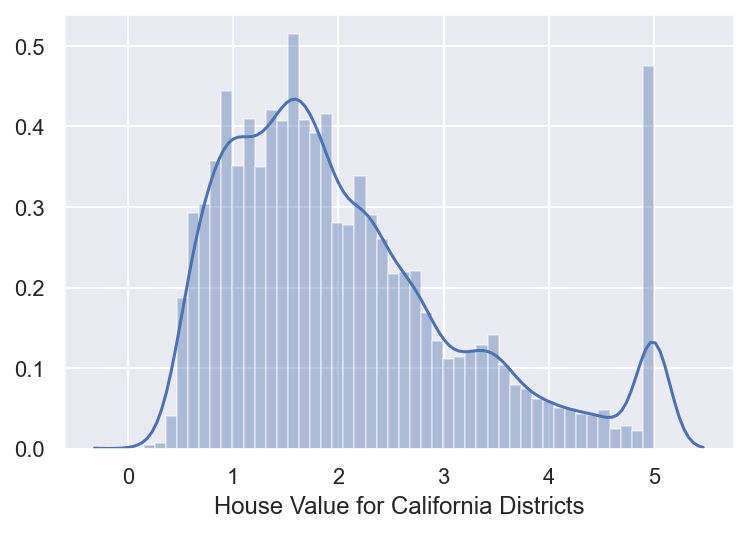

In [59]:
from seaborn import distplot
# make a histogram of the label variable
distplot(y_full, axlabel="House Value for California Districts")

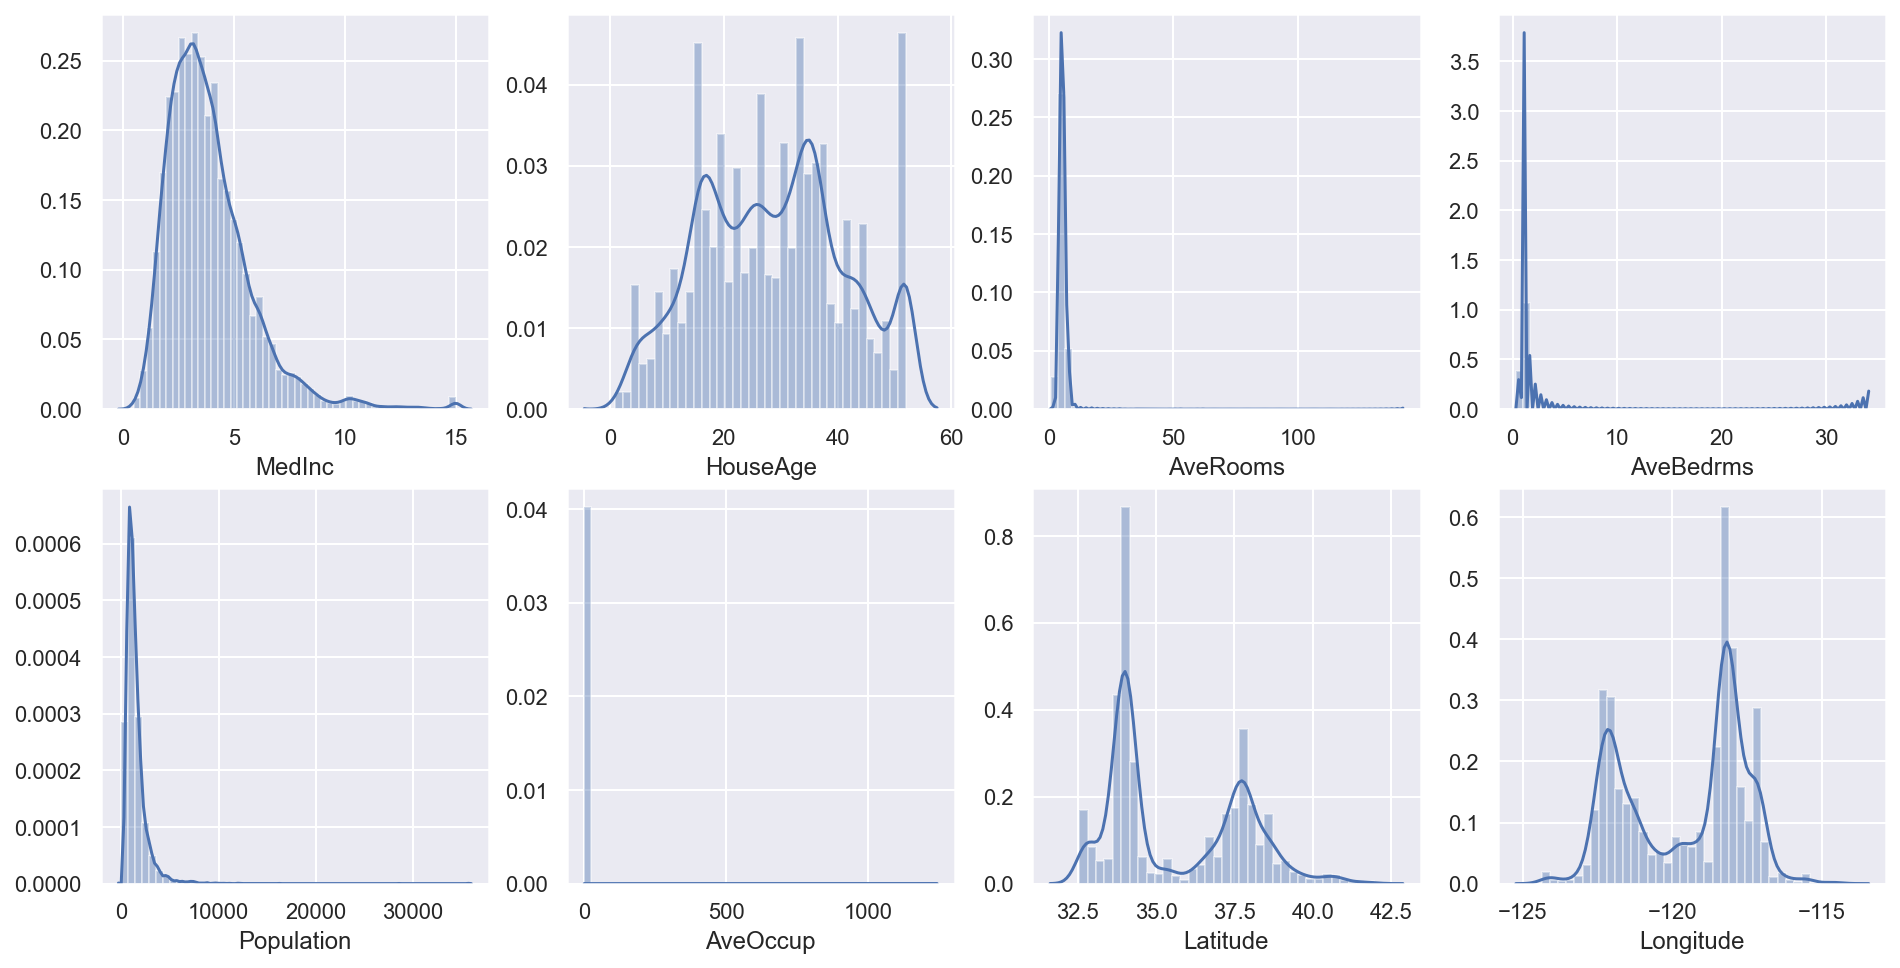

In [60]:
# make histograms of all predictors

f, axes = plt.subplots(2, 4, figsize=(16, 8))
distplot( X_df["MedInc"] , ax=axes[0, 0])
distplot( X_df["HouseAge"] , ax=axes[0, 1])
distplot( X_df["AveRooms"] , ax=axes[0, 2])
distplot( X_df["AveBedrms"] , ax=axes[0, 3])
distplot( X_df["Population"] , ax=axes[1, 0])
distplot( X_df["AveOccup"] , ax=axes[1, 1])
distplot( X_df["Latitude"] , ax=axes[1, 2])
distplot( X_df["Longitude"] , ax=axes[1, 3])

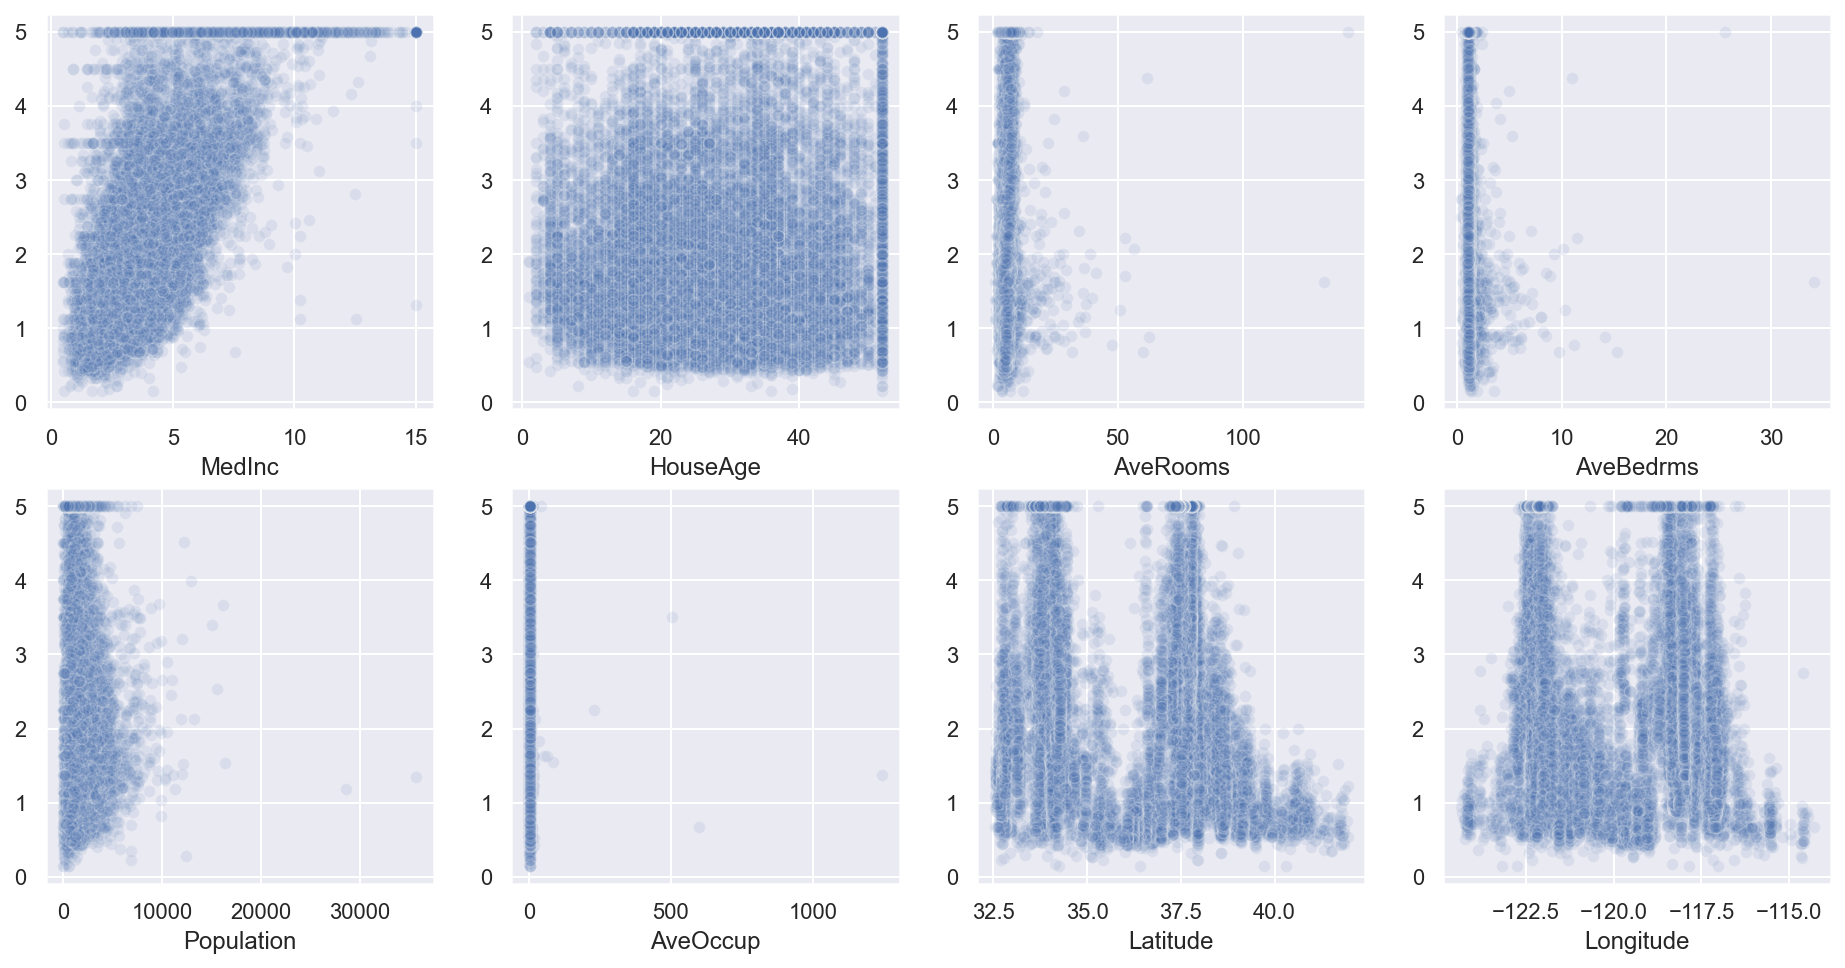

In [72]:
from seaborn import scatterplot
# make scatterplots of all predictors with the label
# without regression
f, axes = plt.subplots(2, 4, figsize=(16, 8))
scatterplot( X_df["MedInc"] , y_full , alpha=0.1 , ax=axes[0, 0])
scatterplot( X_df["HouseAge"] , y_full , alpha=0.1 , ax=axes[0, 1])
scatterplot( X_df["AveRooms"] , y_full , alpha=0.1 , ax=axes[0, 2])
scatterplot( X_df["AveBedrms"] , y_full , alpha=0.1 , ax=axes[0, 3])
scatterplot( X_df["Population"] , y_full , alpha=0.1 , ax=axes[1, 0])
scatterplot( X_df["AveOccup"] , y_full , alpha=0.1 , ax=axes[1, 1])
scatterplot( X_df["Latitude"] , y_full , alpha=0.1 , ax=axes[1, 2])
scatterplot( X_df["Longitude"] , y_full , alpha=0.1 , ax=axes[1, 3])

# Train/Test Split

In [73]:
from sklearn.model_selection import train_test_split
# Split the data into 80% training and 20% test

X_train, X_test, y_train, y_test = train_test_split(X_full, y_full,test_size=0.2, random_state=1)

# Pre-Processing

In [74]:
from sklearn.preprocessing import StandardScaler
# produce standardized predictors with mean zero and variance one 
# fit the transformer in the training set and apply to the whole data

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train) # can add with_mean=False to not take out mean
X_test_scaled = scaler.transform(X_test)


In [77]:
from sklearn.preprocessing import PolynomialFeatures
# produce quadratic polynomial features from all standardized predictors
# squared values and pairwise interactions 
# fit the transformer in the training set and apply to the whole data

poly_features=PolynomialFeatures(degree=2)
X_train_poly=poly_features.fit_transform(X_train_scaled)
X_test_poly=poly_features.fit_transform(X_test_scaled)


## Fractional Ridge Regression
https://arxiv.org/abs/2005.03220

https://nrdg.github.io/fracridge/

In [79]:
!pip install fracridge

In [81]:
from fracridge import FracRidgeRegressorCV
from sklearn.metrics import mean_squared_error, r2_score

In [89]:
# train fractional ridge on raw predictors
# report the chosen fraction penalty
# report MSE and r-squared in test set 

frac_base = FracRidgeRegressorCV()
frac_base.fit(X_train, y_train)
y_test_predict_base = frac_base.predict(X_test)
mse_base = mean_squared_error(y_test, y_test_predict_base)
r2_base = r2_score(y_test, y_test_predict_base)

print("Best Fraction: {:>10.4}".format(frac_base.best_frac_))
print("MSE:           {:>10.4}".format(mse_base))
print("R2:            {:>10.4}".format(r2_base))


Best Fraction:        0.9
MSE:               0.6016
R2:                0.5413


In [91]:
# train fractional ridge on stanardized predictors
# report the chosen fraction penalty
# report MSE and r-squared in test set 
#

frac_scaled = FracRidgeRegressorCV()
frac_scaled.fit(X_train_scaled, y_train)
y_test_predict_scaled = frac_scaled.predict(X_test_scaled)
mse_scaled = mean_squared_error(y_test, y_test_predict_scaled)
r2_scaled = r2_score(y_test, y_test_predict_scaled)

print("Best Fraction: {:>10.4}".format(frac_scaled.best_frac_))
print("MSE:           {:>10.4}".format(mse_scaled))
print("R2:            {:>10.4}".format(r2_scaled))

Best Fraction:        1.0
MSE:                4.754
R2:                -2.624


In [92]:
# train fractional ridge on standardized predictors including quadratics and interactions
# report the chosen fraction penalty
# report MSE and r-squared in test set 

frac_poly = FracRidgeRegressorCV()
frac_poly.fit(X_train_poly, y_train)
y_test_predict_poly = frac_poly.predict(X_test_poly)
mse_poly = mean_squared_error(y_test, y_test_predict_poly)
r2_poly = r2_score(y_test, y_test_predict_poly)

print("Best Fraction: {:>10.4}".format(frac_poly.best_frac_))
print("MSE:           {:>10.4}".format(mse_poly))
print("R2:            {:>10.4}".format(r2_poly))

Best Fraction:        0.1
MSE:               0.4475
R2:                0.6588


In [94]:
from seaborn import regplot

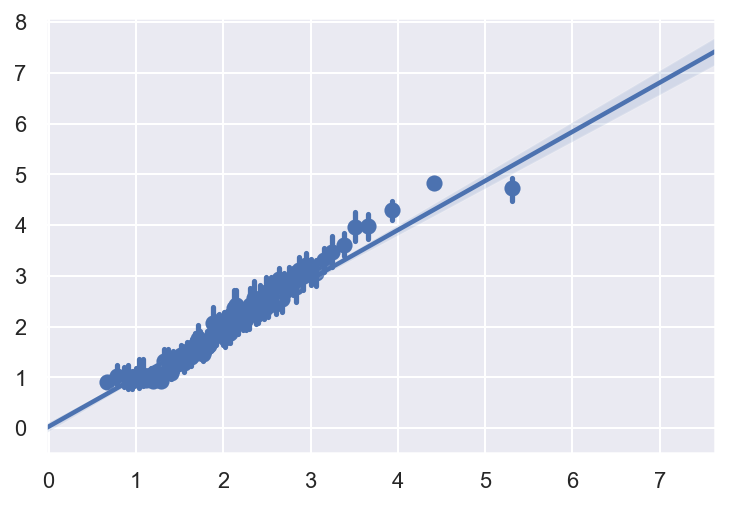

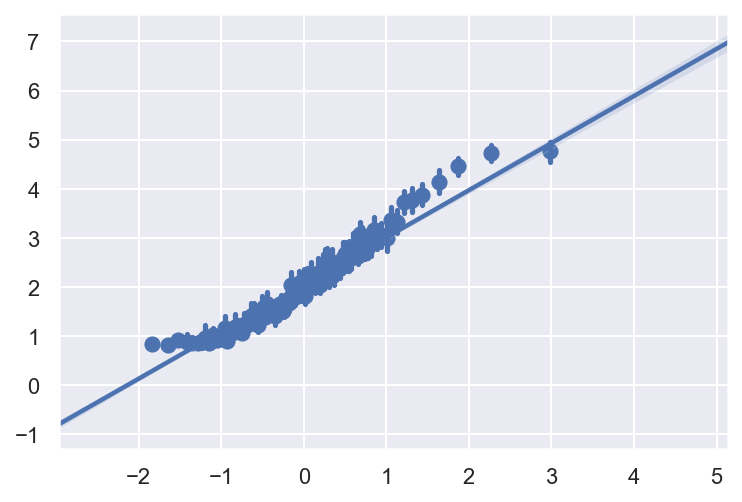

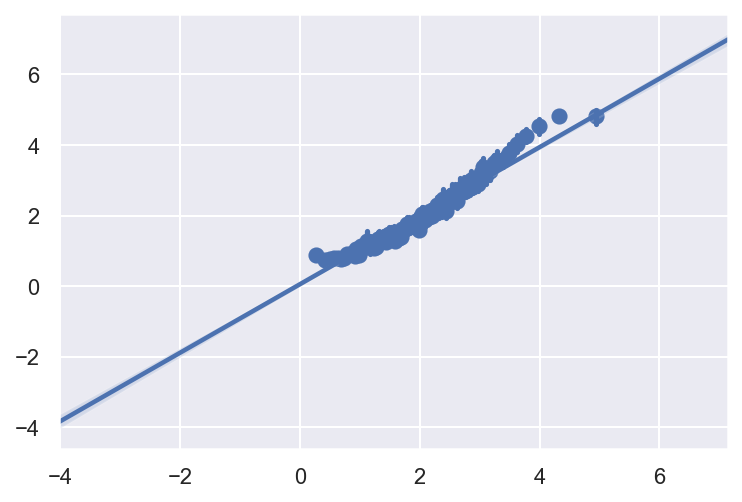

In [98]:
# report a binned regplot of the true outcome versus predictions in the test set

r1=regplot(x= y_test_predict_base, y=y_test, x_bins=100)
plt.show(r1)
r2=regplot(x= y_test_predict_scaled, y=y_test, x_bins=100)
plt.show(r2)
r3=regplot(x= y_test_predict_poly, y=y_test, x_bins=100)
plt.show(r3)
